In [156]:
from collections import Counter

from sklearn import datasets

irisData = datasets.load_iris()
print(irisData.data)  #les features
print(irisData.target)  # les targets
print(irisData.data.shape)  #la taille des données (150 instances et 4 attributs)
print(irisData.feature_names)
print(irisData.target_names)
print(irisData.data[32])  # les attributs de la 32ème instance
print(irisData.target[32])  # la classe de la 32ème instance
print(Counter(irisData.target))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# Analyse du Dataset Iris

## Structure du Dataset
- **Nombre total d'échantillons**: 150 instances
- **Features (attributs)**: 4 mesures par instance
    1. Longueur du sépale (cm)
    2. Largeur du sépale (cm)
    3. Longueur du pétale (cm)
    4. Largeur du pétale (cm)
- **Target (cible)**: 3 espèces d'iris différentes

    | Code | Espèce     |
    |------|------------|
    | 0    | Setosa     |
    | 1    | Versicolor |
    | 2    | Virginica  |

## Équilibre des Données
Le dataset est parfaitement équilibré :
- 50 échantillons par espèce
- Chaque espèce représente 1/3 du dataset

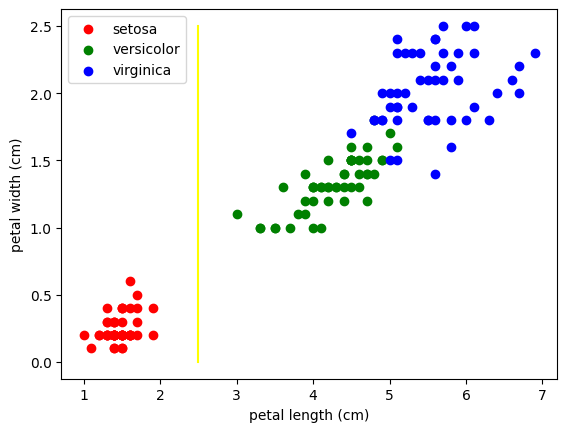

In [157]:
import pylab as pl
from itertools import cycle


def plot_2d(data, target, target_names):
    colors = cycle('rgbcmykw')  # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)
    pl.plot([2.5, 2.5], [0, 2.5], color="yellow")
    pl.xlabel(irisData.feature_names[2])
    pl.ylabel(irisData.feature_names[3])
    pl.legend()
    pl.show()


plot_2d(irisData.data, irisData.target, irisData.target_names)

#### Séparation de Setosa
La classe Setosa est clairement distinguable en utilisant les mesures des pétales (la droite `Longueur du pétale = 2.5 cm`). Cette séparation est nette et sans chevauchement.

#### Distinction Versicolor vs Virginica
La séparation entre ces deux espèces est plus complexe. Il y a chevauchement si on utilise des droites.

Sachant cela, on pourra tolerer une erreur du modèle entre Versicolor et Virginica, mais on ne tolérera pas d'erreurs pour Setosa

In [158]:
from sklearn import naive_bayes

nb = naive_bayes.MultinomialNB(fit_prior=True)  # un algo d'apprentissage
nb.fit(irisData.data[:], irisData.target[:])
p31 = nb.predict(irisData.data[31].reshape(1, -1))
print(p31)
plast = nb.predict(irisData.data[-1].reshape(1, -1))
print(plast)
p = nb.predict(irisData.data[:])
print(p)


[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Comme on s'y attendait, notre modèle predit correctement les classes 0, mais confond un peu entre 1 et 2. Calculons l'erreur:

In [159]:
nb1 = naive_bayes.MultinomialNB(fit_prior=True)
nb1.fit(irisData.data[:99], irisData.target[:99])
p1 = nb1.predict(irisData.data[100:149])
print(p1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


Ici, on réalise:
- **Entraînement** : Uniquement sur les classes 0 (Setosa) et 1 (Versicolor)
- **Test** : Sur la classe 2 (Virginica)

Le modèle classifie systématiquement les Virginica comme Versicolor
- **Explication** :
  1. Le modèle ne connaît que deux classes (0 et 1).
  2. La classe Versicolor (1) est morphologiquement plus proche de Virginica (2).
  3. Le modèle choisit donc naturellement la classe la plus similaire.

Il est donc necessaire d'entrainer le modele sur des données representatives de toutes les classes

In [160]:
import numpy as np

ea = 0
for i in range(len(irisData.data)):
    if irisData.target[i] != p[i]:
        ea = ea + 1
print(ea / len(irisData.data))  # erreur calculée "manuellement"
print(np.count_nonzero(irisData.target - p) / len(irisData.data))  # erreur par opération sur les tableaux
score = nb.score(irisData.data, irisData.target)
print(1 - score)  # erreur calculée en utilisant score de scikit-learn

0.04666666666666667
0.04666666666666667
0.046666666666666634


L'erreur sur le training set est assez faible. (0.046).
Calculons-la maintenant sur le testing set pour mesurer la capacité de généralisation du modèle et détecter un potentiel surapprentissage.

In [161]:
def split(s, train_size=0.67):
    combined_data = np.column_stack((s[0], s[1]))
    np.random.shuffle(combined_data)
    dataS1_size = int(len(combined_data) * train_size)
    data_S1 = combined_data[:dataS1_size, :-1]
    target_S1 = combined_data[:dataS1_size, -1]
    data_S2 = combined_data[dataS1_size:, :-1]
    target_S2 = combined_data[dataS1_size:, -1]
    return data_S1, target_S1, data_S2, target_S2


def test(s, clf, train_size=0.67):
    data_S1, target_S1, data_S2, target_S2 = split(s, train_size)
    clf.fit(data_S1, target_S1)
    return 1 - clf.score(data_S2, target_S2)


test([irisData.data, irisData.target], naive_bayes.MultinomialNB(fit_prior=True))

0.36

On obtient des erreurs differentes à chaque fois. Ceci est dû au fait que la distribution entre l'échantillon de test et d'apprentissage est aleatoire et donc change à chaque execution.

In [162]:
def calcul_erreur_moyenne(t, clf, train_size=0.67):
    moy = 0
    for _ in range(t):
        moy += test([irisData.data, irisData.target], clf, train_size)
    return moy / t


repetitions = [10, 50, 100, 200, 500, 1000]
for r in repetitions:
    print(calcul_erreur_moyenne(r, naive_bayes.MultinomialNB(fit_prior=True)))


def calcul_moyenne_erreur_moyenne(t, rep, clf, train_size=0.67):
    moy = 0
    for _ in range(rep):
        moy += calcul_erreur_moyenne(t, clf, train_size)
    return moy / rep


print('--Moyenne--')
for r in repetitions:
    print(calcul_moyenne_erreur_moyenne(r, 20, naive_bayes.MultinomialNB(fit_prior=True)))


0.25199999999999995
0.18880000000000005
0.18020000000000003
0.20499999999999996
0.1980400000000003
0.20286000000000026
--Moyenne--
0.20550000000000002
0.20573999999999998
0.20802
0.19868499999999997
0.2029520000000001
0.2010010000000002


L'erreur moyenne est plus stable lorsqu'on augmente t (environ 0.2). Ceci s'explique par la loi des grands nombres : Plus on augmente le nombre de repetitions, plus la moyenne observée converge vers la moyenne théorique.

In [163]:
print('--Moyenne avec 10% pour le test--')
for r in repetitions:
    print(calcul_moyenne_erreur_moyenne(r, 20, naive_bayes.MultinomialNB(fit_prior=True), 0.9))

--Moyenne avec 10% pour le test--
0.11833333333333333
0.12306666666666666
0.12053333333333324
0.1217499999999998
0.12194666666666706
0.12166666666666703


L'erreur est plus faible lorsqu'on utilise uniquement 10% des données pour le test (environ 0.12). Cela s'explique par le fait que plus de données sont utilisées pour le training du modèle (90%), le rendant donc plus précis.

In [164]:
from sklearn.model_selection import cross_val_score

k_folds = [2, 3, 5, 8, 10]
for k in k_folds:
    score = cross_val_score(naive_bayes.MultinomialNB(fit_prior=True), irisData.data, irisData.target, cv=k)
    print(f"Résultats pour {k}-folds: {1 - score.mean()}")

Résultats pour 2-folds: 0.046666666666666634
Résultats pour 3-folds: 0.053333333333333344
Résultats pour 5-folds: 0.046666666666666634
Résultats pour 8-folds: 0.05263157894736836
Résultats pour 10-folds: 0.046666666666666634


Le cross validation donne les meilleurs résultats (environ 0.05 d'erreur).

In [165]:
from sklearn.tree import DecisionTreeClassifier

for r in repetitions:
    print(calcul_erreur_moyenne(r, DecisionTreeClassifier()))


print('--Moyenne--')
for r in repetitions:
    print(calcul_moyenne_erreur_moyenne(r, 20, DecisionTreeClassifier()))

print('--Moyenne avec 10% pour le test--')
for r in repetitions:
    print(calcul_moyenne_erreur_moyenne(r, 20, DecisionTreeClassifier(), 0.9))

for k in k_folds:
    score = cross_val_score(DecisionTreeClassifier(), irisData.data, irisData.target, cv=k)
    print(f"Résultats pour {k}-folds: {1 - score.mean()}")

0.046000000000000006
0.05520000000000004
0.05480000000000004
0.05480000000000002
0.05355999999999974
0.05484000000000004
--Moyenne--
0.056600000000000025
0.05398000000000005
0.05411000000000003
0.05477500000000002
0.054367999999999694
0.05475900000000002
--Moyenne avec 10% pour le test--
0.05199999999999999
0.05526666666666665
0.052566666666666616
0.05443333333333322
0.051973333333333184
0.05348000000000044
Résultats pour 2-folds: 0.040000000000000036
Résultats pour 3-folds: 0.040000000000000036
Résultats pour 5-folds: 0.039999999999999813
Résultats pour 8-folds: 0.04641812865497075
Résultats pour 10-folds: 0.040000000000000036


On remarque que pour le Decision Tree, l'erreur est toujours autour de 0.05, soit mieux qu'avec le Naive Bayes)